# 예제
1. csv 폴더 안에 있는 drinks.csv 파일 로드 
2. 해당하는 데이터프레임에서 결측치가 존재하는가?
3. continent 컬럼에서 결측치가 존재하는데 결측치들을 'OT' 값으로 대체
4. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '양주소비량', '와인소비량', '알콜농도', '대륙']
5. 알콜농도 컬럼 데이터의 총 평균보다 높은 대륙은 어디인가
    - 대륙별 그룹화 알콜농도의 평균 
    - 전체 알콜농도의 평균값보다 큰 데이터를 출력
6. 국가별 술 소비량 대비 알콜의 비율 컬럼을 생성
    - 파생변수 ( '전체 술 소비량' )
        - 맥주소비량 + 양주소비량 + 와인소비량
    - 파생변수 ('비율') 생성
        - (알콜농도 / 전체 술 소비량) * 100

In [ ]:
# 라이브러리 로드 
import pandas as pd

In [ ]:
# read_csv()를 이용하여 csv 파일 로드 
df = pd.read_csv("./csv/drinks.csv")
df.head()

In [ ]:
# 결측치가 존재하는지 확인 
# info()
df.info()

In [ ]:
# 결측치의 개수를 확인
df.isna().sum()

In [ ]:
# 결측치를 'OT'라는 값으로 대체
df['continent'] = df['continent'].fillna('OT')

In [ ]:
# 컬럼의 이름을 변경 
# df라는 Class 안에 있는 독립적인 변수값인 columns의 데이터를 변경
df.columns = ['국가', '맥주소비량', '양주소비량', '와인소비량', '알콜농도', '대륙']
df.head(1)

In [ ]:
# 대륙별(대륙 컬럼의 데이터를 기준으로 그룹화) 알콜농도의 평균(그룹화 연산)
# df.iloc[:, 1:].groupby(['대륙']).mean()
group_data = df[['대륙', '알콜농도']].groupby(['대륙']).mean()
group_data

In [ ]:
# 알콜농도 전체 데이터의 평균
alcohol_mean = df['알콜농도'].mean()

In [24]:
# (group_data > alcohol_mean)['알콜농도']
flag = group_data['알콜농도'] > alcohol_mean

In [ ]:
group_data.loc[flag]

In [27]:
# 술 소비량 대비 알콜농도 새로운 컬럼

# 전체 술 소비량 컬럼 생성
# 맥주 + 양주 + 와인
df['전체술소비량'] = df['맥주소비량'] + df['양주소비량'] + df['와인소비량']

In [28]:
df.head(1)

,국가,맥주소비량,양주소비량,와인소비량,알콜농도,대륙,전체술소비량
0,Afghanistan,0,0,0,0.0,AS,0


In [31]:
# 비율 컬럼을 생성
# (알콜농도 / 전체술소비량) * 100

df['비율'] = ((df['알콜농도'] / df['전체술소비량']) * 100).fillna(0)

In [ ]:
df.head()

In [35]:
# 전체술소비량 컬럼의 데이터를 기준으로 내림차순 정렬
df2 = df.sort_values(['전체술소비량'], ascending=False)

In [ ]:
df2

In [40]:
# 'South Korea'의 랭킹 확인하려면?
# 인덱스를 초기화 기존의 인덱스는 삭제 
df2.reset_index(drop=True, inplace=True)
# 국가 데이터에서 south korea 검색
# 데이터프레임에서 국가 컬럼의 데이터들 중 'South Korea'와 같은 데이터가 존재하는가? -> 조건식
# 해당하는 조건식을 loc[조건식] 데이터를 출력

# 조건식 생성
flag = df2['국가'] == 'South Korea'
# loc[]을 이용하여 필터
df2.loc[flag]

,국가,맥주소비량,양주소비량,와인소비량,알콜농도,대륙,전체술소비량,비율
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [41]:
# 해당하는 데이터를 그래프로 시각화
import matplotlib.pyplot as plt

c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\eungok\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


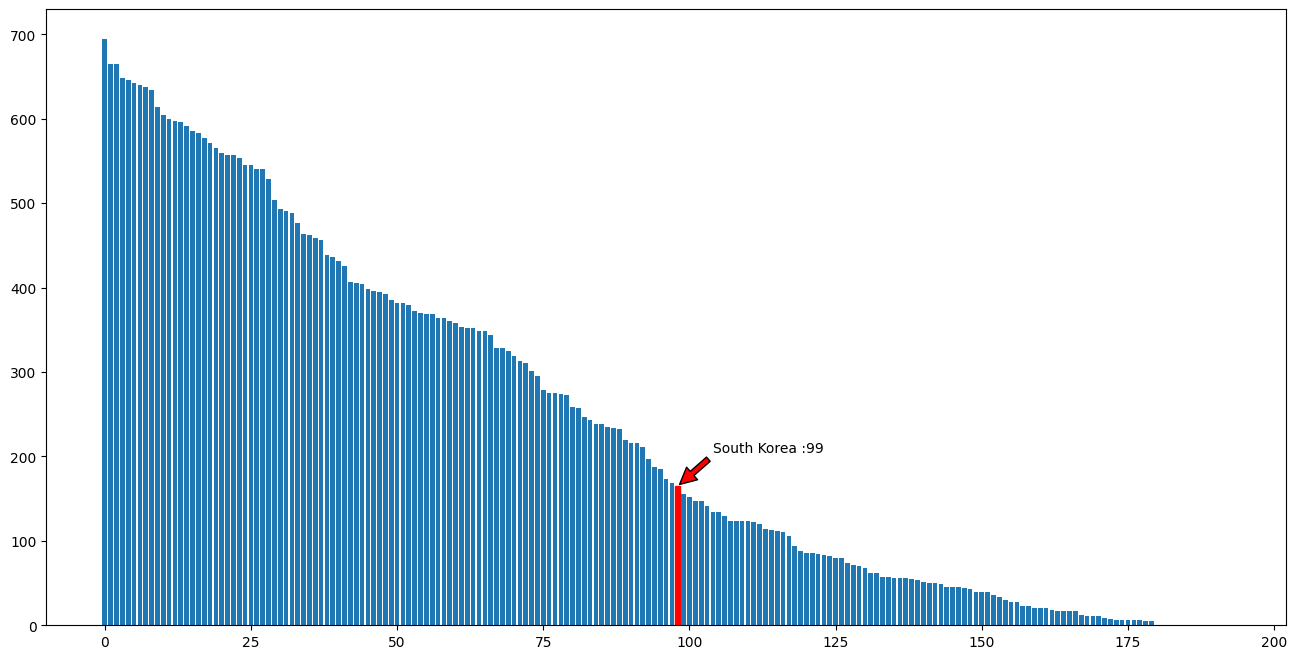

In [48]:
# 술소비량이 높은 순서대로 바형 그래프 표시 
x = df2.index
y = df2['전체술소비량']

# 한국의 인덱스는 몇인가?
korea_index = df2.loc[ df2['국가'] == 'South Korea' ].index[0]
# 한국의 전체술소비량은 몇인가?
korea_total = df2.loc[ 
    df2['국가'] == 'South Korea',  # 인덱스의 조건
    '전체술소비량'                 # 컬럼의 조건
]

# 그래프 사이즈 변경 
plt.figure(figsize=(16, 8))

drink_graph = plt.bar(x, y)

# 한국 데이터의 막대의 색을 변경
# 그래프에서 99번째 막대를 선택하여 색을 빨간색으로 변경
drink_graph[korea_index].set_color('r')

# 그래프에 주석을 추가 
plt.annotate(
    'South Korea :' + str(korea_index + 1),             # 주석의 텍스트
    xytext = (korea_index + 6, korea_total + 40),       # 텍스트의 위치
    xy = (korea_index, korea_total),                    # 텍스트가 가르키는 막대의 좌표
    arrowprops= dict(                                   # 화살표의 모양
        facecolor = 'r', 
        shrink = 0.05
    )
)

plt.show()

In [45]:
df2.loc[ 
    df2['국가'] == 'South Korea',  # 인덱스의 조건
    '전체술소비량'                 # 컬럼의 조건
]

98    165
Name: 전체술소비량, dtype: int64

In [ ]:
_list = [3, 5]

# 3이라는 값만 추출
_list[0]